In [1]:
# import required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data set

data=pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


# Checking data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
data.shape

(48895, 16)

# Data cleaning


In [6]:
#checking for duplicates

data.duplicated().sum()

0

In [7]:
# checking for missing values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#null values %

(data.isnull().sum()/len(data)*100)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [9]:
#Checking null values once again

(data.isnull().sum()/len(data)*100)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
# now we have to columns with null values. "host_name" and "review_per_month"



# Missing value treatment 

In [11]:
#lets replace null values for column "reviews_per_month" to 0

data.fillna({'reviews_per_month':0}, inplace=True)

In [12]:
#recheck for missing values 

(data.isnull().sum()/len(data)*100)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [13]:
 ## let check for unique values in other columns
    
data.host_name.unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [14]:
len(data.host_name.unique())

11453

In [15]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
len(data.neighbourhood_group.unique())

5

In [17]:
len(data.neighbourhood.unique())

221

In [18]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
len(data.room_type.unique())

3

# Univariate analysis 

In [20]:
#host_id
data.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [21]:
#Host_name
data.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [22]:
#top 10 host
data.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

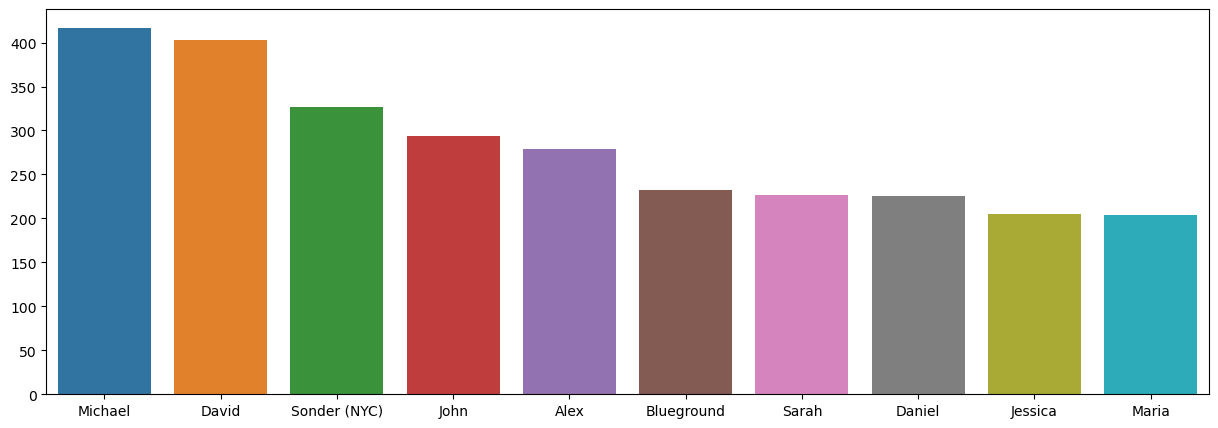

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.host_name.value_counts().index[:10], y=data.host_name.value_counts().values[:10])
plt.show()

# neighbourhood_group

In [24]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [25]:
data.neighbourhood_group.value_counts(normalize =True)*100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

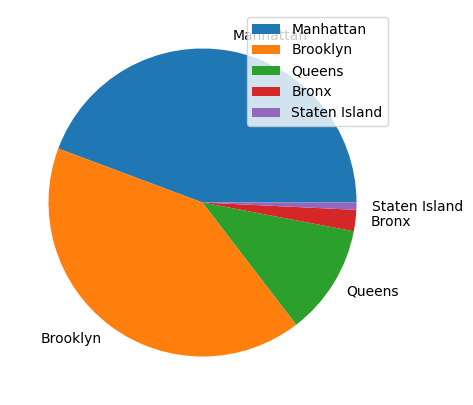

In [26]:
plt.figure(figsize=(5,5))
plt.pie(x=data.neighbourhood_group.value_counts(normalize =True)*100, labels =data.neighbourhood_group.value_counts(normalize =True).index)
plt.legend()
plt.show()

In [27]:
# room type

data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [28]:
data.room_type.value_counts(normalize =True)*100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

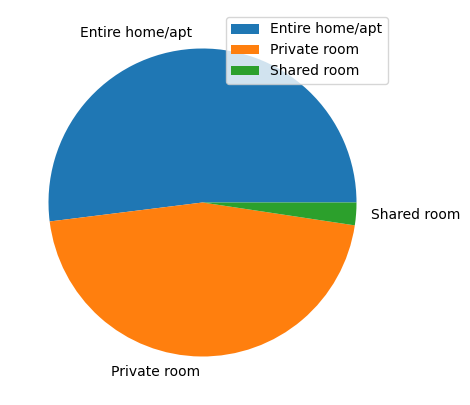

In [29]:
plt.figure(figsize=(5,5))
plt.pie(x=data.room_type.value_counts(normalize =True)*100, labels =data.room_type.value_counts(normalize =True).index)
plt.legend()
plt.show()

In [30]:
## Price

data.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

<AxesSubplot:ylabel='Frequency'>

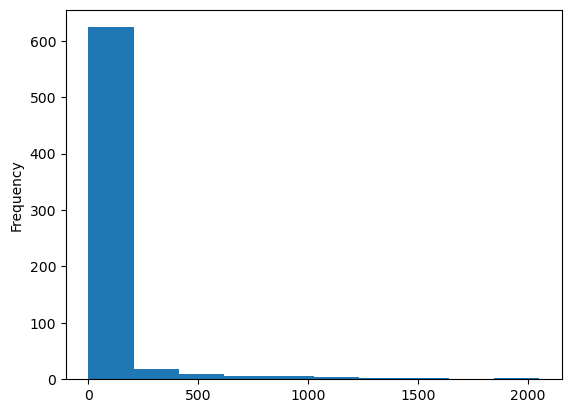

In [31]:
data.price.value_counts().plot.hist()

<AxesSubplot:xlabel='price', ylabel='Count'>

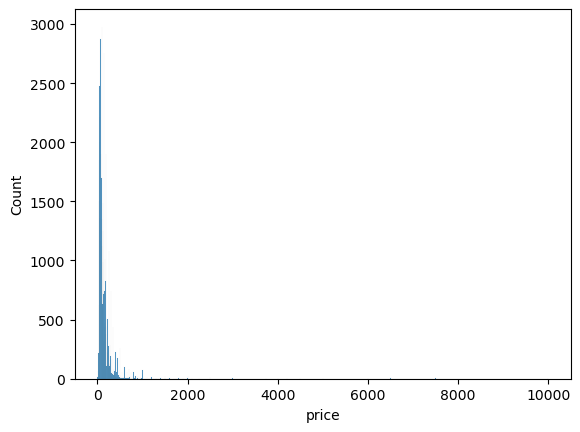

In [32]:
sns.histplot(data=data.price)

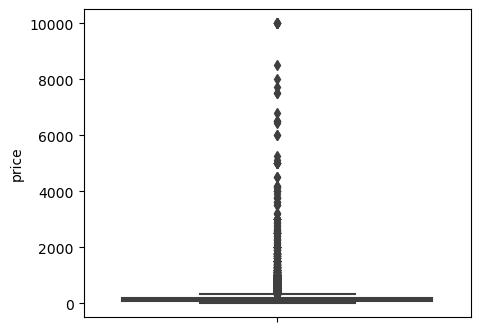

In [33]:
plt.figure(figsize=(5,4))
sns.boxplot(y=data.price)
plt.show()

In [34]:
## Minimum nights count

data.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [35]:
data.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

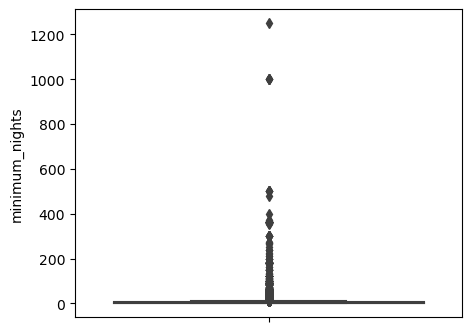

In [36]:
plt.figure(figsize=(5,4))
sns.boxplot(y=data.minimum_nights)
plt.show()

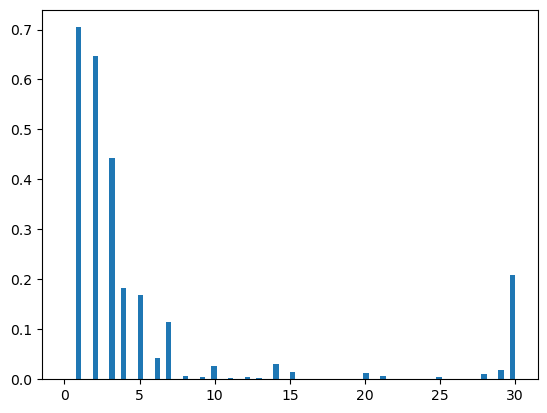

In [37]:
plt.hist(data=data, x='minimum_nights', bins=80, range=(0,30), density=True)
plt.show()

In [38]:
## No of reviewes

data.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

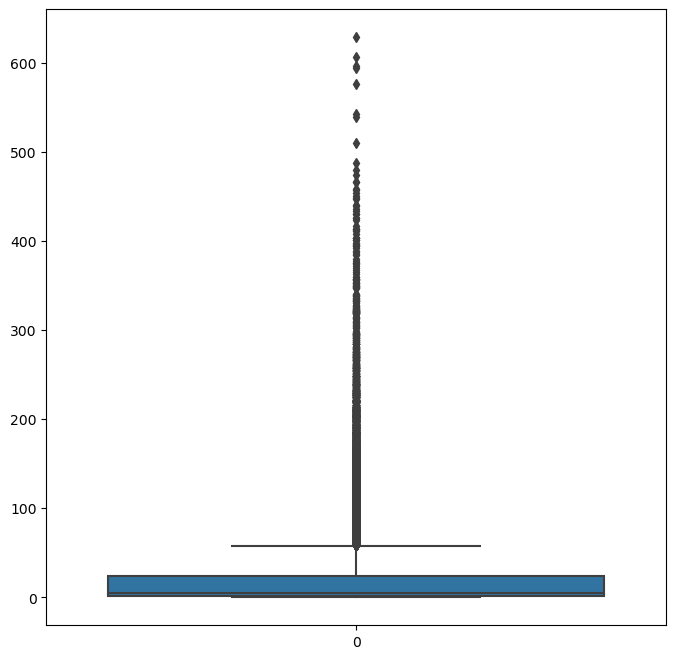

In [39]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data.number_of_reviews)
plt.show()

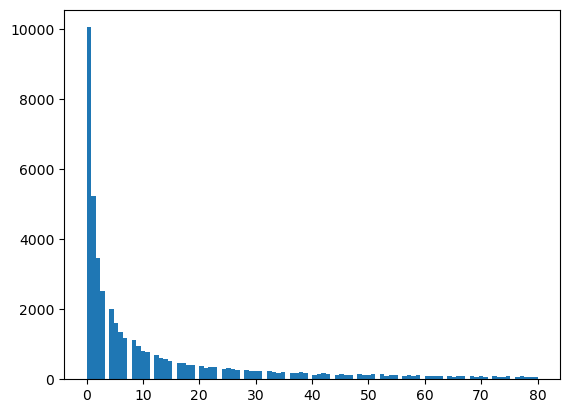

In [40]:
plt.hist(data=data, x='number_of_reviews', bins=100, range= (0,80))
plt.show()

In [41]:
## Reviews per Month

data.reviews_per_month.describe()

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

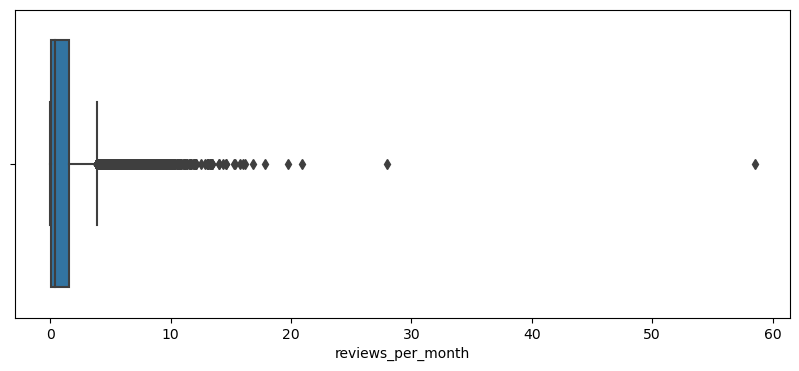

In [42]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data, x= 'reviews_per_month')
plt.show()

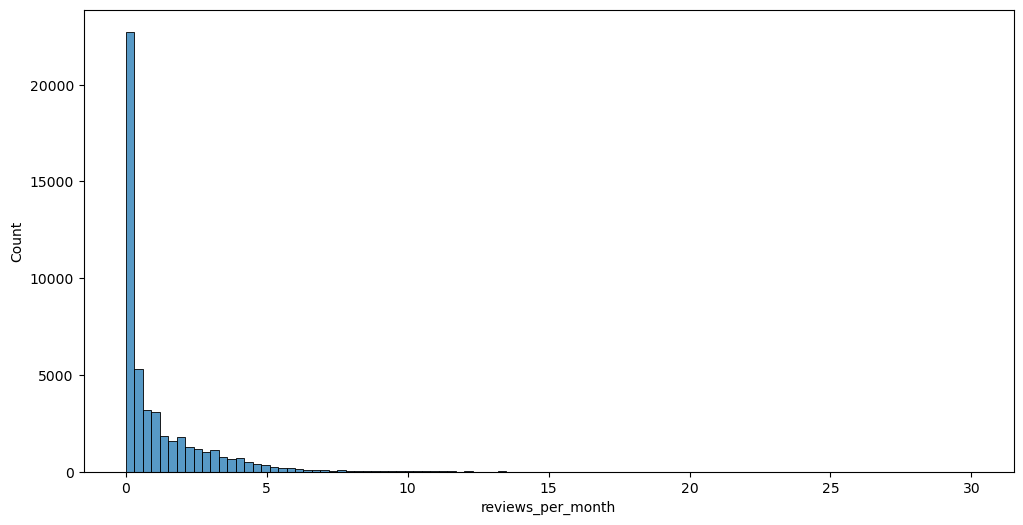

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='reviews_per_month', bins=100, binrange= (0,30))
plt.show()

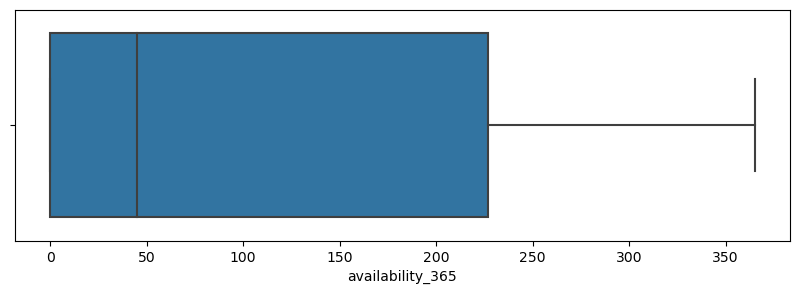

In [44]:
##  Availability_365

plt.figure(figsize=(10,3))
sns.boxplot(data=data, x='availability_365')
plt.show()

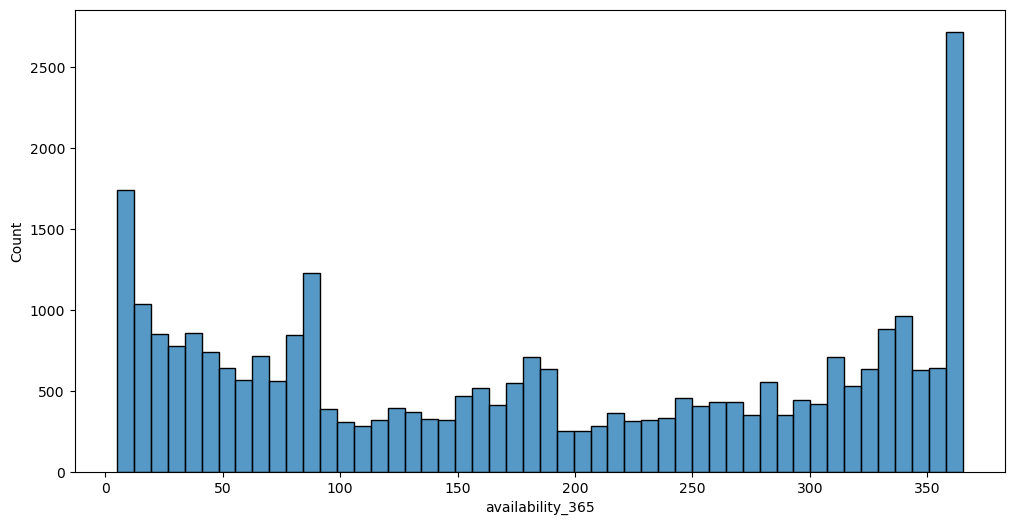

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='availability_365', bins=50, binrange= (5,365))
plt.show()

In [46]:
## Minimum_night_categiries

data.minimum_nights.value_counts()


1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

# Category creation for few columns

#-1. Availability_365

In [47]:
def availability_365_categories_function(row):
    
    if row<=1:
        return 'Very Low'
    elif row <=100:
        return 'Low'
    elif row <=200:
        return 'Medium'
    elif row<=300 :
        return 'High'
    else:
        return 'Very High'

In [48]:
data['availability_categories']= data.availability_365.map(availability_365_categories_function)
data['availability_categories']

0        Very High
1        Very High
2        Very High
3           Medium
4         Very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_categories, Length: 48895, dtype: object

In [49]:
data['availability_categories'].value_counts()

Very Low     17941
Low          11829
Very High     8108
Medium        5792
High          5225
Name: availability_categories, dtype: int64

In [50]:
# 2-  categorizing 'minimum_nights'

def minimum_nights_categories_function(row):
    
    if row<=1:
        return 'Very Low'
    elif row <=3:
        return 'Low'
    elif row <=5:
        return 'Medium'
    elif row<=7 :
        return 'High'
    else:
        return 'Very High'

In [51]:
data['minimum_nights_categories']= data.minimum_nights.map(minimum_nights_categories_function)
data['minimum_nights_categories']

0         Very Low
1         Very Low
2              Low
3         Very Low
4        Very High
           ...    
48890          Low
48891       Medium
48892    Very High
48893     Very Low
48894         High
Name: minimum_nights_categories, Length: 48895, dtype: object

In [52]:
data['minimum_nights_categories'].value_counts()

Low          19695
Very Low     12720
Very High     7333
Medium        6337
High          2810
Name: minimum_nights_categories, dtype: int64

In [53]:
#3 categorizing "number of reviews" columns

In [54]:
def number_of_reviews_categories_function(row):
    
    if row<=1:
        return 'Very Low'
    elif row <=5:
        return 'Low'
    elif row <=10:
        return 'Medium'
    elif row<=30 :
        return 'High'
    else:
        return 'Very High'

In [55]:
data['number_of_reviews_categories']=data.number_of_reviews.map(number_of_reviews_categories_function)
data['number_of_reviews_categories']

0           Medium
1        Very High
2         Very Low
3        Very High
4           Medium
           ...    
48890     Very Low
48891     Very Low
48892     Very Low
48893     Very Low
48894     Very Low
Name: number_of_reviews_categories, Length: 48895, dtype: object

In [56]:
data['number_of_reviews_categories'].value_counts()

Very Low     15296
Very High    10336
Low           9597
High          8236
Medium        5430
Name: number_of_reviews_categories, dtype: int64

In [57]:
## categorizing 'Price' column

def price_categories_function(row):
    
    if row<=1:
        return 'Very Low'
    elif row <=4:
        return 'Low'
    elif row <=15:
        return 'Medium'
    elif row<=100:
        return 'High'
    else:
        return 'Very High'

In [58]:
data['price_categories']=data.price.map(price_categories_function)
data['price_categories']

0        Very High
1        Very High
2        Very High
3             High
4             High
           ...    
48890         High
48891         High
48892    Very High
48893         High
48894         High
Name: price_categories, Length: 48895, dtype: object

In [59]:
data['price_categories'].value_counts()

Very High    24967
High         23886
Medium          31
Very Low        11
Name: price_categories, dtype: int64

# Data typpe

In [60]:
# 1- Categorical Columns

In [61]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_categories',
       'minimum_nights_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [67]:
categoorical_columns= data.columns[[0,1,3,4,5,8,16,17,18,19]]
categoorical_columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_categories', 'minimum_nights_categories',
       'number_of_reviews_categories', 'price_categories'],
      dtype='object')

In [63]:
# 2- Numeric Columns


In [68]:
numerical_columns=data.columns[[9,10,11,13,14,15]]
numerical_columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [65]:
#3 Coordinate and Date

In [71]:
coordinates=data.columns[[5,6,12]]
coordinates

Index(['neighbourhood', 'latitude', 'last_review'], dtype='object')

# Bivariate and Multivariate analysis

In [ ]:
## Finding Corelations

In [72]:
data[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,0.00,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [73]:
data[numerical_columns].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


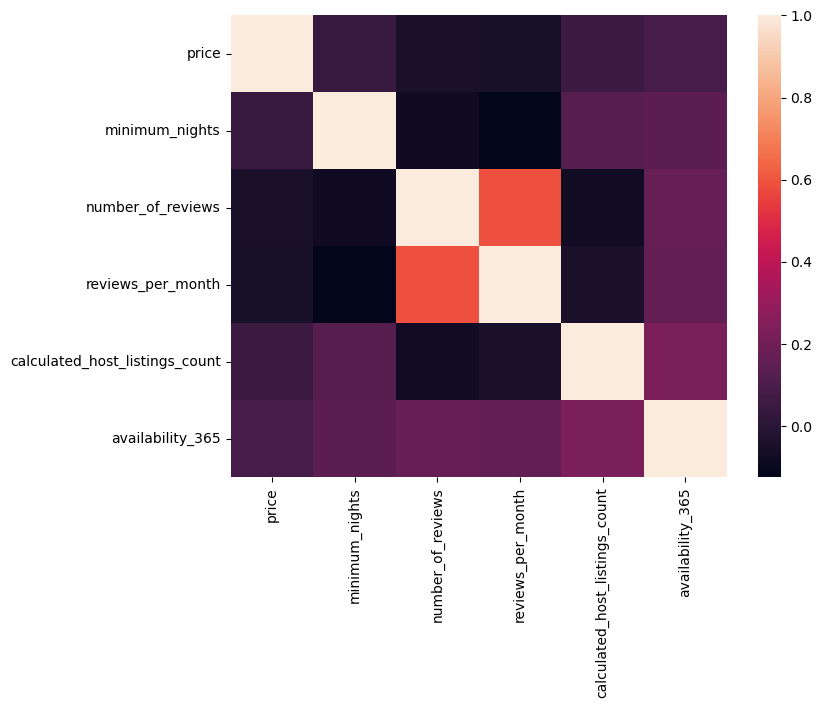

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(data=data[numerical_columns].corr())
plt.show()

In [ ]:
## absolute Co-relation


In [78]:
corr_matrix=data[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
corr_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,0.047954,0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,0.080116,0.124905,0.127960,0.144303
number_of_reviews,0.047954,0.080116,1.000000,0.589407,0.072376,0.172028
reviews_per_month,0.050564,0.124905,0.589407,1.000000,0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,0.072376,0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [79]:
sol

number_of_reviews               reviews_per_month                 0.589407
calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
reviews_per_month               availability_365                  0.163732
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.124905
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                reviews_per_month                 0.050564
                                number_of_reviews                 0.047954
reviews_per_month        

In [80]:
## Lets extract meaningful co-relations

sol[1:8]

calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
reviews_per_month               availability_365                  0.163732
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.124905
price                           availability_365                  0.081829
dtype: float64

In [82]:
## number of reviews categoris and price

##price for each review_ categories 
x1=data.groupby('number_of_reviews_categories').price.sum().sort_values(ascending=False)
x1

number_of_reviews_categories
Very Low     2722793
Low          1420309
Very High    1356076
High         1155254
Medium        812846
Name: price, dtype: int64

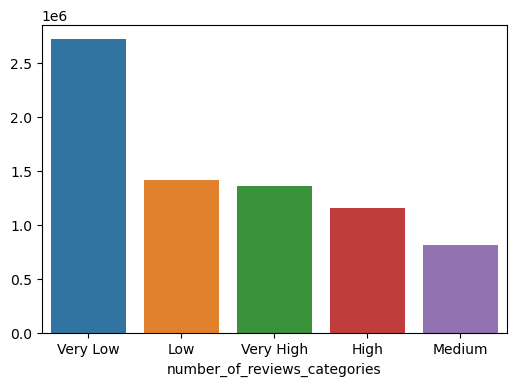

In [84]:
plt.figure(figsize=(6,4))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<AxesSubplot:xlabel='number_of_reviews_categories', ylabel='price'>

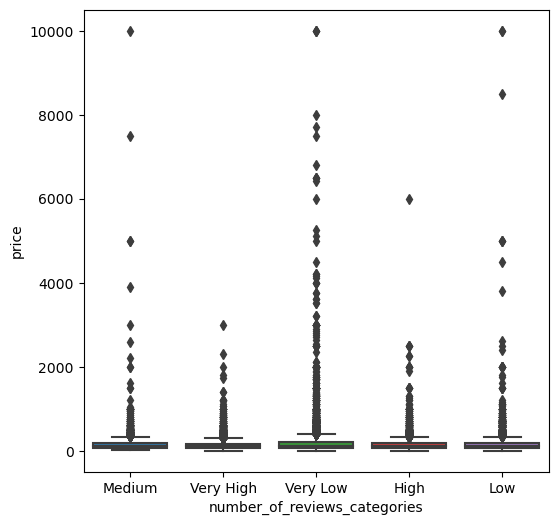

In [88]:
plt.figure(figsize=(6,6))
sns.boxplot(x = data.number_of_reviews_categories , y = data.price)

In [89]:
data.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
Very High    131.199303
High         140.268820
Low          147.995103
Medium       149.695396
Very Low     178.006865
Name: price, dtype: float64

In [90]:
data.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
High         100.0
Very High    100.0
Low          105.0
Medium       110.0
Very Low     115.0
Name: price, dtype: float64

In [91]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Very Low,2722793
1,Low,1420309
2,Very High,1356076
3,High,1155254
4,Medium,812846


In [92]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
Medium       10.885439
High         15.470885
Very High    18.160245
Low          19.020438
Very Low     36.462992
Name: price, dtype: float64

# What is the pricing ranges preferred by customers?
#### The total price for  'Low' or 'very Low' number_of_reviews_categories are high.

In [94]:
## Room type and Number of reviews-categories 
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [95]:
pd.crosstab(data['room_type'], data['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,Very High,Very Low
room_type,,,,,
Entire home/apt,4281,5177,3015,5306,7630
Private room,3758,4213,2290,4850,7215
Shared room,197,207,125,180,451


In [96]:
data.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [97]:
data.groupby('room_type').number_of_reviews.sum()/data.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

#### The various kinds of properties that exist w.r.t. customer preferences.?
#### Entire home/apt have more reviews than Shared rooms
#### 'Shared room' are less likey to give reviews. only 16 %

In [98]:
# room type and price category
pd.crosstab(data['room_type'], data['price_categories'])

price_categories,High,Medium,Very High,Very Low
room_type,,,,
Entire home/apt,4559,13,20835,2
Private room,18305,10,4004,7
Shared room,1022,8,128,2


In [99]:
## Room type and review per month
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [100]:
data.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.045509
Private room       1.143493
Shared room        1.073345
Name: reviews_per_month, dtype: float64

In [101]:
data.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.350
Private room       0.400
Shared room        0.405
Name: reviews_per_month, dtype: float64

In [102]:
data.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

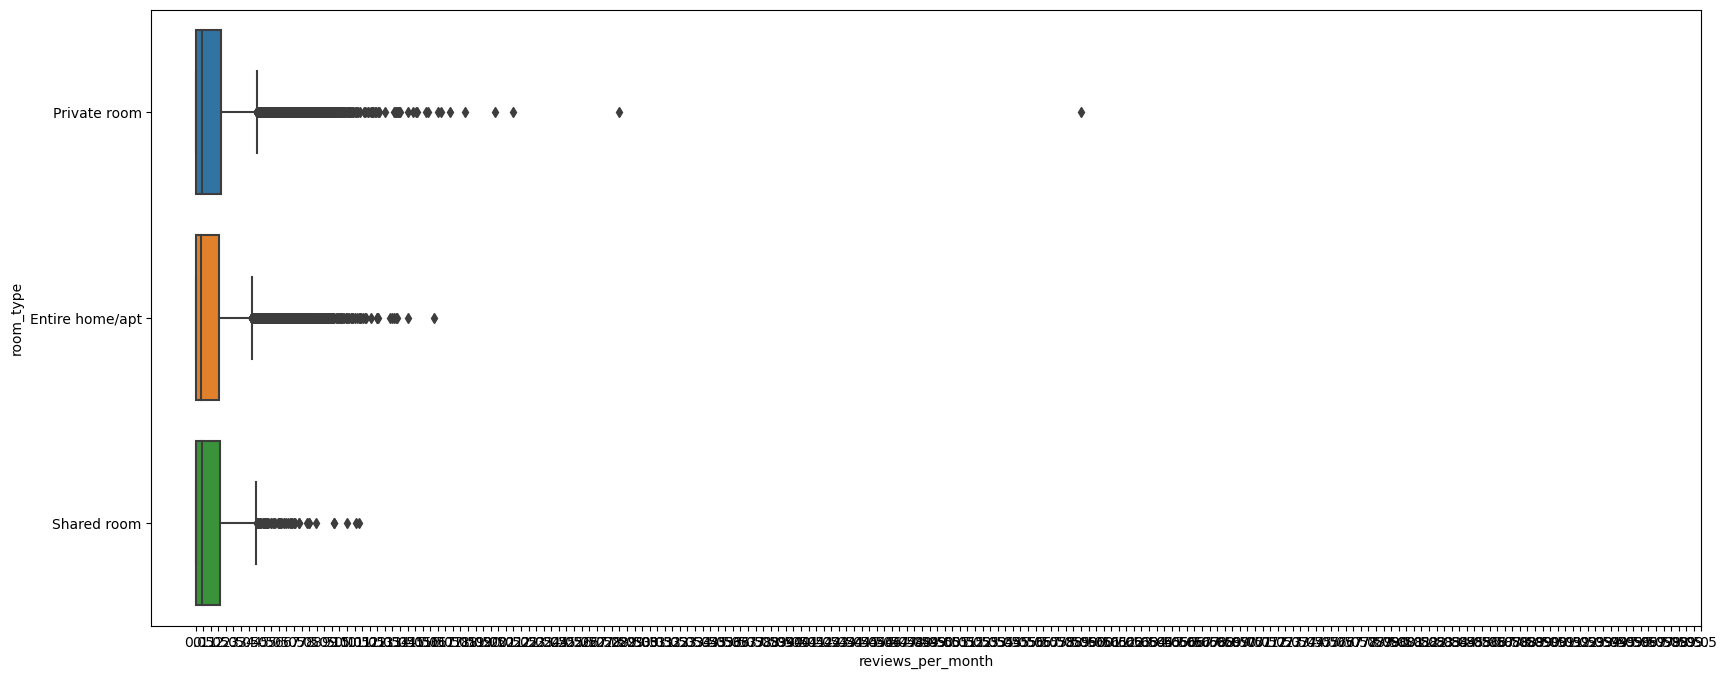

In [108]:
plt.figure(figsize=(20,8))
sns.boxplot(data = data, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

#### For each 'room_type' there are ~1.4 reviews per month on average.

In [ ]:
### minimum_night_categories and reviews_per_month

In [110]:
data.groupby('minimum_nights_categories').reviews_per_month.sum().sort_values()

minimum_nights_categories
High          1227.57
Very High     2235.19
Medium        4689.73
Very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

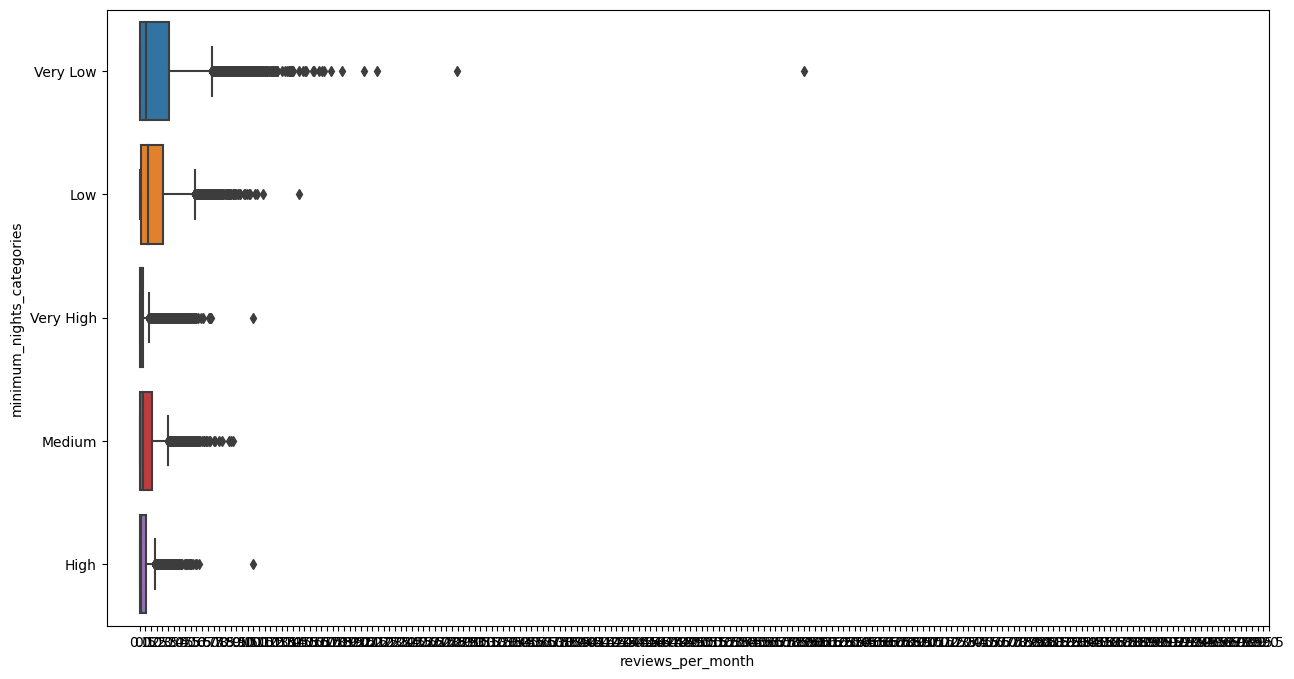

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(data = data, y = 'minimum_nights_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

#### Customer's are more likely to leave reviews for low number of minimum nights

In [ ]:
## 'availability_365_categories', 'price_categories' and 'reviews_per_month'

In [115]:
data.availability_categories.value_counts()

Very Low     17941
Low          11829
Very High     8108
Medium        5792
High          5225
Name: availability_categories, dtype: int64

In [117]:
pd.DataFrame(data.groupby(['availability_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_categories price_categories                   
High                    High                       1.824837
                        Medium                     1.450000
                        Very High                  1.822034
                        Very Low                   4.360000
Low                     High                       1.797606
                        Medium                     2.460000
                        Very High                  1.355372
                        Very Low                   0.100000
Medium                  High                       1.860767
                        Medium                     0.102500
                        Very High                  1.578075
                        Very Low                   2.366667
Very High               High                       1.334211
                        Medium                     0.480000
                        Very High                  0.849307
                        Very Low                   0.110000
Very Low                High                       0.396799
                        Medium                     0.270833
                        Very High                  0.327756
                        Very Low                   0.413333

#### If the combination of availability and price is very high, reviews_per_month will be low on average.
#### Very high availability and very low price are likely to get more reviews.

In [118]:
data.to_csv('AB_NYC_2019_processed.csv')